In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scp

import glob
import os

In [3]:
#Deepsig was used to make these predictions
#https://academic.oup.com/bioinformatics/article/34/10/1690/4769493
sig_pep_df = pd.read_csv(
    '../../inputs/deepsig_results.csv',
    sep = '\t',
    header = None,
    names = ['gene','origin','feature','start','end','score','dot1','dot2','evidence'],
)
sig_pep_df.head()

,gene,origin,feature,start,end,score,dot1,dot2,evidence
0,Xkr4,DeepSig,Chain,1,647,.,.,.,evidence=ECO:0000256
1,Sox17,DeepSig,Chain,1,419,.,.,.,evidence=ECO:0000256
2,Oprk1,DeepSig,Chain,1,409,.,.,.,evidence=ECO:0000256
3,Npbwr1,DeepSig,Chain,1,329,.,.,.,evidence=ECO:0000256
4,Rb1cc1,DeepSig,Chain,1,1588,.,.,.,evidence=ECO:0000256


In [6]:
sig_pep_df = sig_pep_df[sig_pep_df['feature'].eq('Signal peptide')]
sig_pep_df['score'] = sig_pep_df['score'].astype(float)
sig_pep_df.shape

(1500, 9)

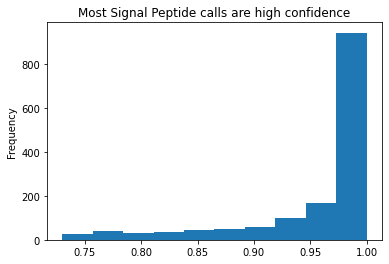

In [8]:
sig_pep_df['score'].plot.hist()
plt.title('Most Signal Peptide calls are high confidence')
plt.show()
plt.close()

In [9]:
sig_pep_df = sig_pep_df[sig_pep_df['score'].ge(0.95)]
sig_pep_df.shape

(1113, 9)

In [10]:
genes_with_sig_pep = set(sig_pep_df['gene'])

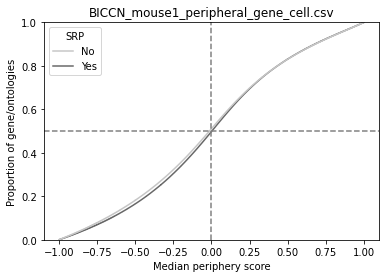

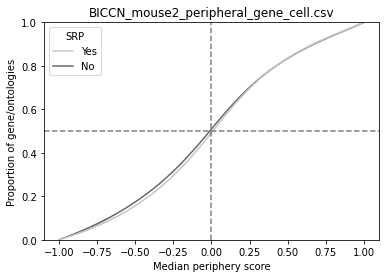

/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/dev_env/lib64/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


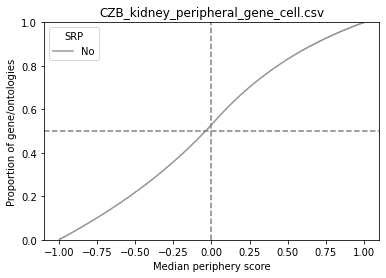

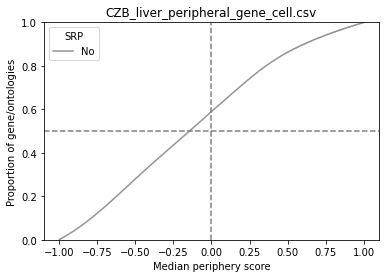

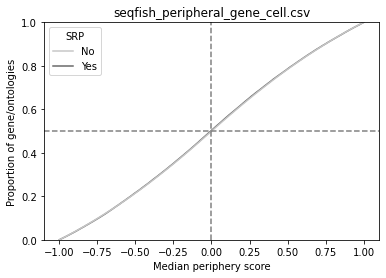

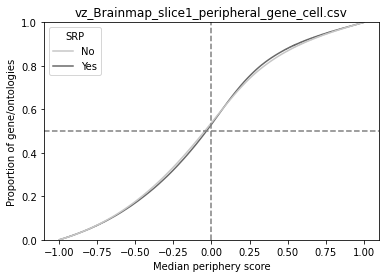

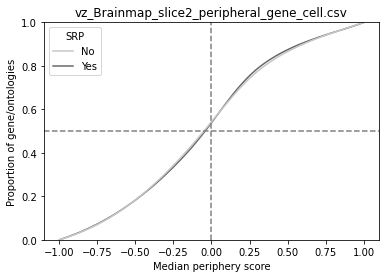

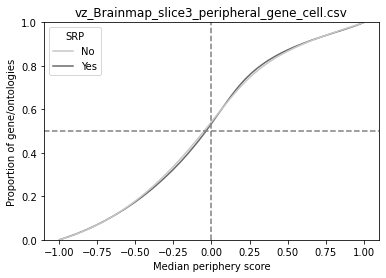

/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/dev_env/lib64/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


KeyboardInterrupt: 

In [25]:
#Plot eCDFs for each sample of peripheral score distributions for genes w/ and w/out predicted SRPs
periph_paths = sorted(glob.glob('../../nf_pipeline/outputs/SRRS_20220526/gene_cell/*peripheral*'))

for periph_path in periph_paths:
    f_name = os.path.basename(periph_path)
    
    df = pd.read_csv(periph_path)
    df['SRP'] = np.where(df['gene'].isin(genes_with_sig_pep),'Yes','No')
    
    sns.ecdfplot(
        x = 'score',
        hue = 'SRP',
        palette = 'Greys',
        data = df,
    )
    plt.axhline(0.5, linestyle='dashed', color='grey')
    plt.axvline(0.0, linestyle='dashed', color='grey')

    plt.title('{}'.format(f_name))
    plt.xlabel('Periphery score')
    plt.ylabel('Proportion of gene/ontologies')
    plt.show()
    plt.close()
    

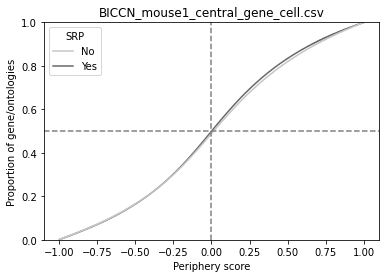

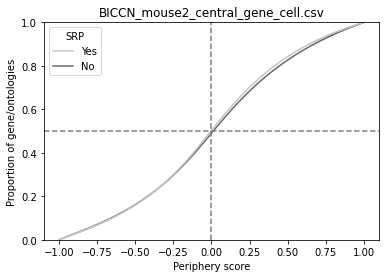

/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/dev_env/lib64/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


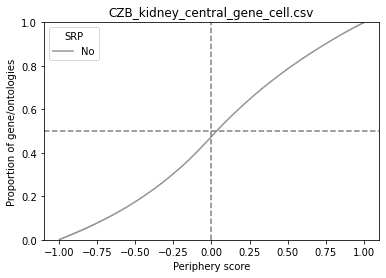

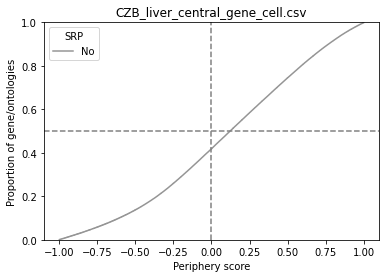

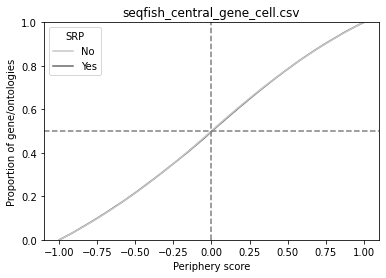

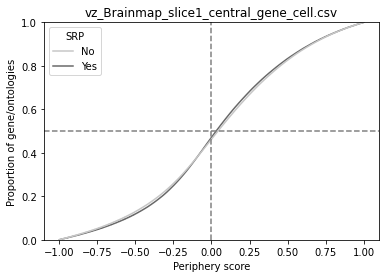

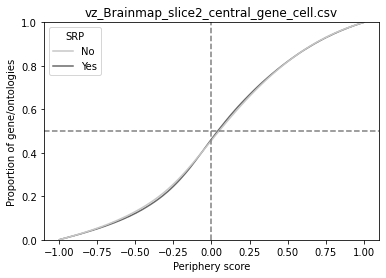

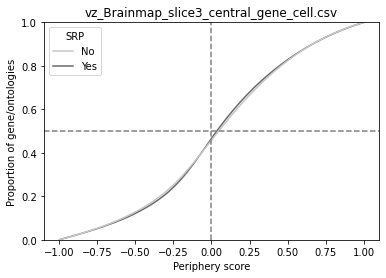

KeyboardInterrupt: 

In [27]:
#Plot eCDFs for each sample of peripheral score distributions for genes w/ and w/out predicted SRPs
periph_paths = sorted(glob.glob('../../nf_pipeline/outputs/SRRS_20220526/gene_cell/*central*'))

for periph_path in periph_paths:
    f_name = os.path.basename(periph_path)
    
    #note, these files are large and slow
    if 'vz_liver' in f_name:
        continue
    
    df = pd.read_csv(periph_path)
    df['SRP'] = np.where(df['gene'].isin(genes_with_sig_pep),'Yes','No')
    
    sns.ecdfplot(
        x = 'score',
        hue = 'SRP',
        palette = 'Greys',
        data = df,
    )
    plt.axhline(0.5, linestyle='dashed', color='grey')
    plt.axvline(0.0, linestyle='dashed', color='grey')

    plt.title('{}'.format(f_name))
    plt.xlabel('Periphery score')
    plt.ylabel('Proportion of gene/ontologies')
    plt.show()
    plt.close()
    